## 공공 인공지능 Open API 활용

In [2]:
with open('etriaikey.txt') as kfile:
    etri_key = kfile.read()

In [3]:
import urllib3
import json
import base64
openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"

In [1]:
import os
img_file = 'Images/공원.jpg'
_, image_type = os.path.splitext(img_file)
image_type

'.jpg'

In [4]:
image_type = 'jpg' if image_type == '.jfif' else image_type[1:]
image_type

'jpg'

In [5]:
with open(img_file, 'rb') as file:
    image_contents = base64.b64encode(file.read()).decode("utf8")

In [6]:
request_json = {
    "access_key": etri_key,
    "argument": {
        "type": image_type,
        "file": image_contents
    }
} 

In [7]:
http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(request_json)
)

In [8]:
print("[responseCode] " + str(response.status))

[responseCode] 200


In [9]:
print(response.data)

b'{"result":0,"return_object":{"data":[{"class":"person","confidence":"0.987463","x":"2","y":"530","width":"162","height":"175"},{"class":"person","confidence":"0.964437","x":"803","y":"540","width":"111","height":"138"},{"class":"person","confidence":"0.961442","x":"392","y":"620","width":"118","height":"134"},{"class":"person","confidence":"0.958245","x":"234","y":"560","width":"123","height":"134"},{"class":"person","confidence":"0.957853","x":"561","y":"610","width":"108","height":"148"},{"class":"person","confidence":"0.957359","x":"335","y":"515","width":"59","height":"91"},{"class":"person","confidence":"0.953815","x":"289","y":"401","width":"59","height":"127"},{"class":"person","confidence":"0.951904","x":"145","y":"491","width":"73","height":"88"},{"class":"person","confidence":"0.946994","x":"618","y":"614","width":"266","height":"214"},{"class":"person","confidence":"0.941594","x":"165","y":"659","width":"474","height":"162"},{"class":"person","confidence":"0.933264","x":"9

In [10]:
result = json.loads(response.data)
result

{'result': 0,
 'return_object': {'data': [{'class': 'person',
    'confidence': '0.987463',
    'x': '2',
    'y': '530',
    'width': '162',
    'height': '175'},
   {'class': 'person',
    'confidence': '0.964437',
    'x': '803',
    'y': '540',
    'width': '111',
    'height': '138'},
   {'class': 'person',
    'confidence': '0.961442',
    'x': '392',
    'y': '620',
    'width': '118',
    'height': '134'},
   {'class': 'person',
    'confidence': '0.958245',
    'x': '234',
    'y': '560',
    'width': '123',
    'height': '134'},
   {'class': 'person',
    'confidence': '0.957853',
    'x': '561',
    'y': '610',
    'width': '108',
    'height': '148'},
   {'class': 'person',
    'confidence': '0.957359',
    'x': '335',
    'y': '515',
    'width': '59',
    'height': '91'},
   {'class': 'person',
    'confidence': '0.953815',
    'x': '289',
    'y': '401',
    'width': '59',
    'height': '127'},
   {'class': 'person',
    'confidence': '0.951904',
    'x': '145',
    'y':

In [11]:
obj_list = result['return_object']['data']
obj_list[0]

{'class': 'person',
 'confidence': '0.987463',
 'x': '2',
 'y': '530',
 'width': '162',
 'height': '175'}

## 시각화

In [12]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
%matplotlib inline

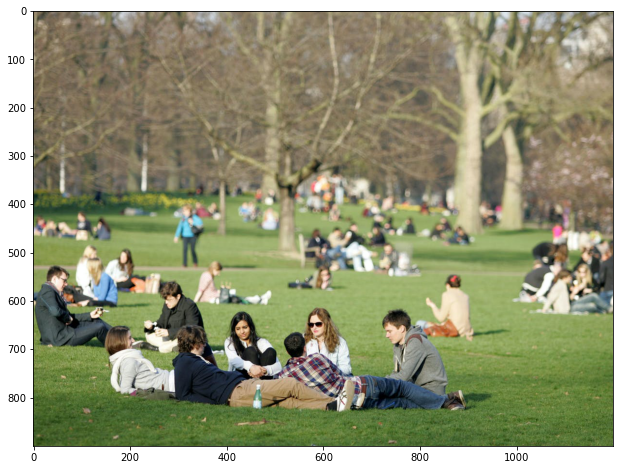

In [13]:
plt.figure(figsize=(12,8))
image = Image.open(img_file)
plt.imshow(image)
plt.show()

In [14]:
draw = ImageDraw.Draw(image)
obj = obj_list[0]

for obj in obj_list:
    name = obj['class']
    x = int(obj['x'])
    y = int(obj['y'])
    w = int(obj['width'])
    h = int(obj['height'])
    draw.text((x+10,y+10), name, font=ImageFont.truetype('malgun.ttf', 100), fill=(255,0,0))
    draw.rectangle(((x,y), (x+w, y+h)), outline=(255,0,0), width=2)

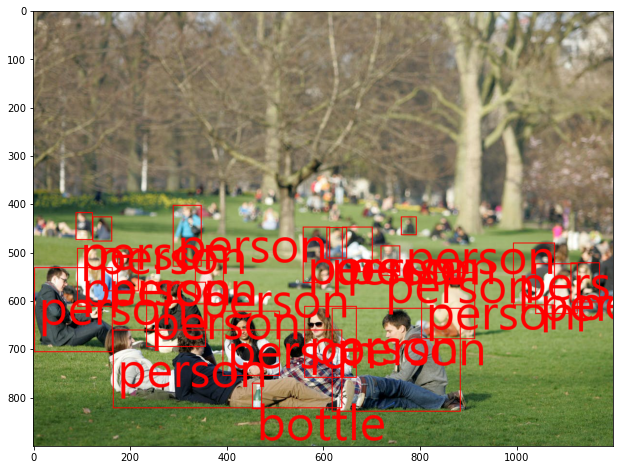

In [15]:
plt.figure(figsize=(12,8))
plt.imshow(image)
plt.show()

## 여러개의 그림 객체검출하기

In [16]:
from glob import glob
glob('Images/*')

['Images\\공원.jpg', 'Images\\동물원.jpg']

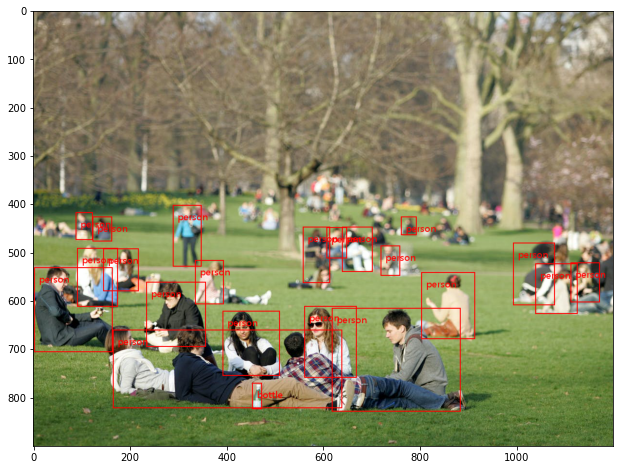

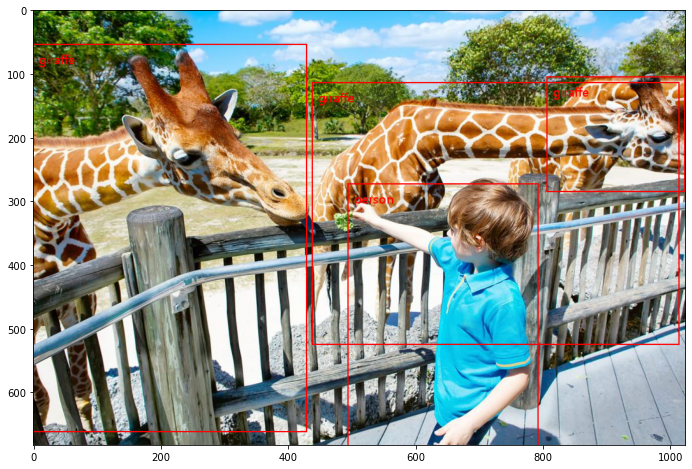

In [17]:
for img_file in glob('images/*'):
    _, image_type = os.path.splitext(img_file)
    image_type = 'jpg' if image_type == '.jfif' else image_type[1:]
    with open(img_file, 'rb') as file:
        image_contents = base64.b64encode(file.read()).decode("utf8")
    
    request_json = {
        "access_key": etri_key,
        "argument": {
            "type": image_type,
            "file": image_contents
        }
    }
    response = http.request(
        "POST",
        openApiURL,
        headers={"Content-Type": "application/json; charset=UTF-8"},
        body=json.dumps(request_json)
    )
    result = json.loads(response.data)
    obj_list = result['return_object']['data']

    image = Image.open(img_file)
    draw = ImageDraw.Draw(image)
    for obj in obj_list:
        name = obj['class']
        x = int(obj['x'])
        y = int(obj['y'])
        w = int(obj['width'])
        h = int(obj['height'])
        draw.text((x+10,y+10), name, font=ImageFont.truetype('malgun.ttf',20), fill=(255,0,0))
        draw.rectangle(((x,y), (x+w,y+h)), outline=(255,0,0), width=2)
    
    plt.figure(figsize=(12,8))
    plt.imshow(image)
    plt.show()